# Gradient decent on anscombe dataset (simple linear regression)

# Batch Gradient decent

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_anscombe = sns.load_dataset('anscombe')
df_anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
df_anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [4]:
# df_anscombe = df_anscombe.replace('I',1).replace('II',2).replace('III',3).replace('IV',4)

In [5]:
# df_anscombe

In [6]:
df_anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [7]:
df_anscombe.shape

(44, 3)

In [8]:
x1 = df_anscombe.x.values
y = df_anscombe.y.values


beta0, beta1 = 0,0

alpha = 0.01
epochs = 10000
n = df_anscombe.shape[0]



for i in range (epochs):
    yhat = beta0 + beta1*x1 
 
      
    d_beta0 = (-1/n) * sum((y - yhat))
    d_beta1 = (-1/n) * sum(x1 * (y - yhat))
 
     
    beta0 = beta0 - alpha * d_beta0 
    beta1 = beta1 - alpha * d_beta1


    
print("beta0 = {:.5f}\nbeta1 = {:.5f}\n".format(beta0,beta1))

beta0 = 3.00124
beta1 = 0.49994



# Stochastic Gradient Descent

In [9]:
#input data
x1 = df_anscombe.x.values
y = df_anscombe.y.values


#initializing betas, learning rate and no of iteration
beta0 , beta1= 0,0
alpha = 0.01 
epochs = 10000
n = df_anscombe.shape[0]




for i in range(epochs):
    # Select a random index from the training examples
    idx = np.random.randint(0, n)
    # Get the corresponding input values
    x1_i, y_i = x1[idx], y[idx]
    # Get the prediction for the current input using the current weights 
    yhat_i = beta0 + beta1*x1_i

    # Calculate the gradients of the cost function 
    d_beta0 = (-1) * (y_i - yhat_i)
    d_beta1 = (-1) * x1_i * (y_i - yhat_i)

    # update the gradients
    beta0 = beta0 - alpha * d_beta0
    beta1 = beta1 - alpha * d_beta1 


    
print("beta0 = {:.5f}\nbeta1 = {:.5f}\n".format(beta0, beta1))

beta0 = 3.02965
beta1 = 0.51928



# Mini-Batch Gradient Descent

In [10]:
x1 = df_anscombe.x.values
y = df_anscombe.y.values 

beta0 , beta1 = 0,0

alpha = 0.01 
epochs = 10000
batch_size = 32
n = df_anscombe.shape[0] 

for i in range(epochs):

    random_indices = np.random.randint(n, size=batch_size) 
    batch_x1 = x1[random_indices]
    batch_y = y[random_indices]


    batch_yhat = beta0 + beta1*batch_x1 

    
    d_beta0 = (-1/batch_size) * sum((batch_y - batch_yhat)) 
    d_beta1 = (-1/batch_size) * sum(batch_x1 * (batch_y - batch_yhat)) 

    
    beta0 = beta0 - alpha * d_beta0
    beta1 = beta1 - alpha * d_beta1 
 


    
print("beta0 = {:.5f}\nbeta1 = {:.5f}\n".format(beta0, beta1))

beta0 = 3.00971
beta1 = 0.52336



Text(0, 0.5, 'y')

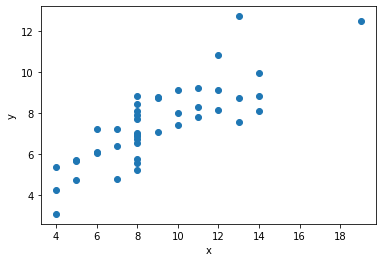

In [11]:
fig, ax = plt.subplots()

x = df_anscombe['x']
y = df_anscombe['y']

ax.scatter(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')

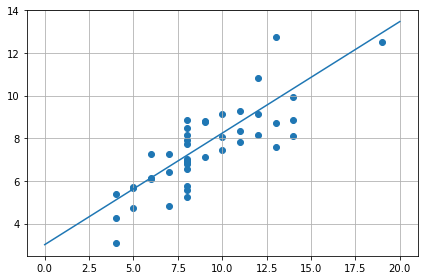

In [12]:
fig, ax = plt.subplots()

x = df_anscombe['x']
y = df_anscombe['y']

ax.scatter(x,y)

xline = np.linspace(0, 20, 100)
yline = beta0 + beta1 * xline


ax.plot(xline,yline)
plt.grid(True)
plt.tight_layout()

# gradient decent on advertising dataset

In [13]:
df_advertising = pd.read_csv("datasets/advertising4D.csv")
df_advertising


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
#input features
x1 = df_advertising.TV.values
x2 = df_advertising.radio.values
x3 = df_advertising.newspaper.values
y = df_advertising.sales.values

#initializing betas/weights, learning rate, no of iteration
beta0, beta1, beta2, beta3 = 0, 0, 0, 0
alpha = 0.1
epochs = 1
n = df_advertising.shape[0]



for i in range (epochs):
    yhat = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3 
 
      
    d_beta0 = (-1/n) * sum((y - yhat))
    d_beta1 = (-1/n) * sum(x1 * (y - yhat))
    d_beta2 = (-1/n) * sum(x2 * (y - yhat))
    d_beta3 = (-1/n) * sum(x3 * (y - yhat))
 
     
    beta0 = beta0 - alpha * d_beta0 
    beta1 = beta1 - alpha * d_beta1
    beta2 = beta2 - alpha * d_beta2
    beta3 = beta3 - alpha * d_beta3



print("beta0 = {:.5f}\nbeta1 = {:.5f}\nbeta2 = {:.5f}\nbeta3 = {:.5f}".format(beta0,beta1,beta2,beta3))

beta0 = 1.40225
beta1 = 241.05417
beta2 = 37.06320
beta3 = 45.42551


# Stochastic Gradient Descent


In [24]:
#input data
x1 = df_advertising.TV.values
x2 = df_advertising.radio.values
x3 = df_advertising.newspaper.values
y = df_advertising.sales.values


#initializing betas/weights, learning rate, no of iteration
beta0, beta1, beta2, beta3 = 0, 0, 0, 0
alpha = 0.1
epochs = 1
n = df_advertising.shape[0]




for i in range(epochs):
    # Select a random index from the training examples
    idx = np.random.randint(0, n)
    # Get the corresponding input values
    x1_i, x2_i, x3_i, y_i = x1[idx], x2[idx], x3[idx], y[idx]
    # Get the prediction for the current input using the current weights 
    yhat_i = beta0 + beta1 * x1_i + beta2 * x2_i + beta3 * x3_i

    # Calculate the gradients of the cost function 
    d_beta0 = (-1) * (y_i - yhat_i)
    d_beta1 = (-1) * x1_i * (y_i - yhat_i)
    d_beta2 = (-1) * x2_i * (y_i - yhat_i)
    d_beta3 = (-1) * x3_i * (y_i - yhat_i)

    # update the gradients
    beta0 = beta0 - alpha * d_beta0
    beta1 = beta1 - alpha * d_beta1
    beta2 = beta2 - alpha * d_beta2
    beta3 = beta3 - alpha * d_beta3


    
print("beta0 = {:.5f}\nbeta1 = {:.5f}\nbeta2 = {:.5f}\nbeta3 = {:.5f}".format(beta0,beta1,beta2,beta3))

beta0 = 1.22000
beta1 = 252.29600
beta2 = 6.34400
beta3 = 23.66800


# Mini-Batch Gradient Descent

In [26]:
#input data
x1 = df_advertising.TV.values
x2 = df_advertising.radio.values
x3 = df_advertising.newspaper.values
y = df_advertising.sales.values


#initializing betas/weights, learning rate, no of iteration
beta0, beta1, beta2, beta3 = 0, 0, 0, 0
alpha = 0.1
epochs = 1
n = df_advertising.shape[0] 

for i in range(epochs):

    random_indices = np.random.randint(n, size=batch_size) 
    batch_x1 = x1[random_indices]
    batch_x2 = x2[random_indices]
    batch_x3 = x3[random_indices]
    batch_y = y[random_indices]


    batch_yhat = beta0 + beta1 * batch_x1 + beta2 * batch_x2 + beta3 * batch_x3

    
    d_beta0 = (-1/batch_size) * sum((batch_y - batch_yhat)) 
    d_beta1 = (-1/batch_size) * sum(batch_x1 * (batch_y - batch_yhat))
    d_beta2 = (-1/batch_size) * sum(batch_x2 * (batch_y - batch_yhat))
    d_beta3 = (-1/batch_size) * sum(batch_x3 * (batch_y - batch_yhat))
    
    
    
    beta0 = beta0 - alpha * d_beta0
    beta1 = beta1 - alpha * d_beta1
    beta2 = beta2 - alpha * d_beta2
    beta3 = beta3 - alpha * d_beta3
 

    
print("beta0 = {:.5f}\nbeta1 = {:.5f}\nbeta2 = {:.5f}\nbeta3 = {:.5f}".format(beta0,beta1,beta2,beta3))

beta0 = 1.42469
beta1 = 216.93225
beta2 = 43.38497
beta3 = 41.91134
